<a href="https://colab.research.google.com/github/HRS5020/Tensorflow/blob/main/Intel_image_classificaiton_using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel image classification

Dataset : https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Info : This is image data of Natural Scenes around the world.
This Data contains around 25k images of size 150x150 distributed under 6 categories (buildings, forest, glacier, mountain, sea ,street).There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.optimizers import RMSprop


# Data import

In [2]:
# download the zip file of the dataset from the source (Kaggle website)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

%cd /content/drive/MyDrive/Kaggle/

# run the command below only once to download the data in google drive
# !kaggle datasets download -d puneet6060/intel-image-classification --unzip

/content/drive/MyDrive/Kaggle


In [4]:
# Directory path with our training  pictures for each label

train_buildings_dir = os.path.join('./seg_train/seg_train/buildings/')
train_forest_dir = os.path.join('./seg_train/seg_train/forest/')
train_glacier_dir = os.path.join('./seg_train/seg_train/glacier/')
train_mountain_dir = os.path.join('./seg_train/seg_train/mountain/')
train_sea_dir = os.path.join('./seg_train/seg_train/sea/')
train_street_dir = os.path.join('./seg_train/seg_train/street/')

In [ ]:
# training folder meta data 

building_names = os.listdir('./seg_train/seg_train/buildings/')
print('Sample building names = ', building_names[:10])

print('\ntotal number of train building pictures = ', len(os.listdir('./seg_train/seg_train/buildings/')))
print('total number of train forest pictures = ', len(os.listdir('./seg_train/seg_train/forest/')))
print('total number of train glacier pictures = ', len(os.listdir('./seg_train/seg_train/glacier/')))
print('total number of train mountain pictures = ', len(os.listdir('./seg_train/seg_train/mountain/')))
print('total number of train sea pictures = ', len(os.listdir('./seg_train/seg_train/sea/')))
print('total number of train street pictures = ', len(os.listdir('./seg_train/seg_train/street/')))


Sample building names =  ['19456.jpg', '19460.jpg', '19466.jpg', '19513.jpg', '19526.jpg', '19537.jpg', '1954.jpg', '1955.jpg', '19552.jpg', '19556.jpg']

total number of train building pictures =  2191
total number of train forest pictures =  2271
total number of train glacier pictures =  2404
total number of train mountain pictures =  2512
total number of train sea pictures =  2274
total number of train street pictures =  2382


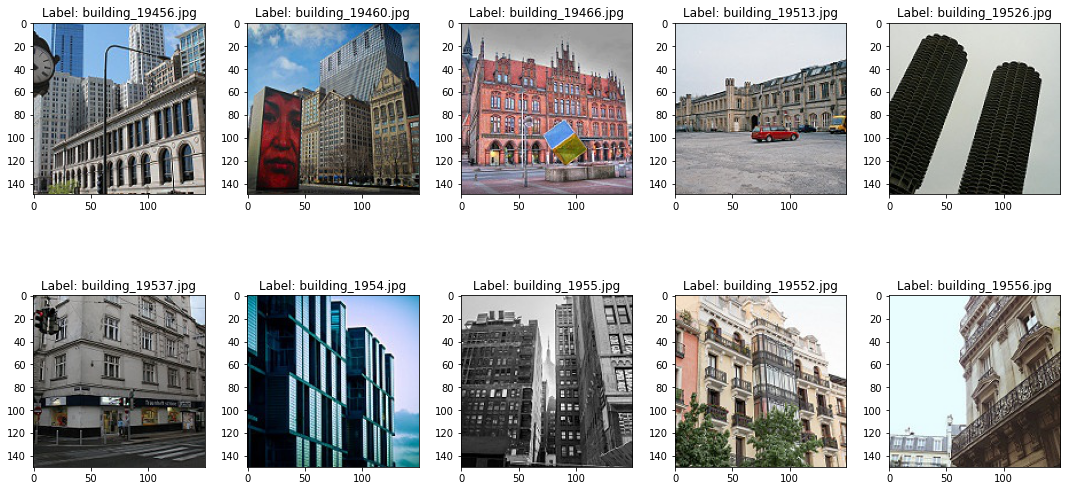

In [5]:
# print some of the training images 

# To show only one image at a time
# train_building_images = os.listdir('./seg_train/seg_train/buildings/')
# for i in range(0,10):
#     img = mpimg.imread('./seg_train/seg_train/buildings/'+train_building_images[i])
#     imgplot = plt.imshow(img)
#     plt.show()


# A group of images
dir = './seg_train/seg_train/buildings/'
filenames = [os.path.abspath(os.path.join(dir,i)) for i in os.listdir(dir)]

num_image = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_image):
    ax = axes[i//num_col, i%num_col]
    image = mpimg.imread(filenames[i])
    ax.imshow(image)
    ax.set_title('Label: building_{}'.format(os.listdir(dir)[i]))
plt.tight_layout()
plt.show()

# Data preprocessing

In [6]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalize the data from (0 to 255) to (0 to 1 float32)

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator

train_generator = train_datagen.flow_from_directory(
                                                    './seg_train/seg_train/',
                                                    target_size=(150, 150),
                                                    batch_size=128,
                                                    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
                                                './seg_test/seg_test/',
                                                target_size=(150, 150),
                                                batch_size=128,
                                                class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# CNN model

Same architecture used previously for FMNIST dataset.

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='softmax')
])


model.summary()


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=8,  
                    epochs=15)

Epoch 1/15
8/8 [==============================] - 21s 2s/step - loss: 1.7844 - accuracy: 0.1820
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 1.6503 - accuracy: 0.3789
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 1.5270 - accuracy: 0.3711
Epoch 4/15
8/8 [==============================] - 21s 3s/step - loss: 1.4309 - accuracy: 0.4062
Epoch 5/15
8/8 [==============================] - 21s 3s/step - loss: 1.3374 - accuracy: 0.4580
Epoch 6/15
8/8 [==============================] - 22s 3s/step - loss: 1.2832 - accuracy: 0.4844
Epoch 7/15
8/8 [==============================] - 21s 3s/step - loss: 1.2397 - accuracy: 0.4902
Epoch 8/15
8/8 [==============================] - 20s 2s/step - loss: 1.2644 - accuracy: 0.5041
Epoch 9/15
8/8 [==============================] - 21s 3s/step - loss: 1.1718 - accuracy: 0.5225
Epoch 10/15
8/8 [==============================] - 21s 3s/step - loss: 1.1579 - accuracy: 0.5361
Epoch 11/15
8/8 [======================

In [ ]:
model.evaluate(test_generator)

24/24 [==============================] - 21s 858ms/step - loss: 1.0097 - accuracy: 0.5813


[1.0097383260726929, 0.581333339214325]

# VGG19 model

*   TF documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19
*   Research paper: https://arxiv.org/abs/1409.1556




In [ ]:
# import a model with vgg19 architecture trained on imagenet

vgg19_model = tf.keras.applications.vgg19.VGG19(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(150,150,3),
                    pooling='max'
                    )

# To not train these weights with our training images
for layers in vgg19_model.layers:
    layers.trainable=False

# apppend 2 custom dense layers to classify intel images  
# trainable with intel images
vgg19_output = vgg19_model.layers[-1].output
appended_layer = tf.keras.layers.Flatten()(vgg19_output)
appended_layer = tf.keras.layers.Dense(256,activation='relu')(appended_layer)
appended_layer = tf.keras.layers.Dense(6, activation='softmax')(appended_layer)


# final model
vgg19_final_model = tf.keras.Model(vgg19_model.input, appended_layer)
print(vgg19_final_model.summary())
vgg19_final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


80150528/80134624 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
history = vgg19_final_model.fit(train_generator,  
                                steps_per_epoch=10,
                                epochs=10,
                                validation_data=test_generator,
                                validation_steps=24)

vgg19_final_model.evaluate(test_generator)

Epoch 1/10
10/10 [==============================] - 1564s 170s/step - loss: 0.5553 - accuracy: 0.7945 - val_loss: 0.5763 - val_accuracy: 0.7863
Epoch 2/10
10/10 [==============================] - 258s 26s/step - loss: 0.5180 - accuracy: 0.8079 - val_loss: 0.5731 - val_accuracy: 0.7733
Epoch 3/10
10/10 [==============================] - 251s 25s/step - loss: 0.5223 - accuracy: 0.8188 - val_loss: 0.5852 - val_accuracy: 0.7617
Epoch 4/10
10/10 [==============================] - 232s 23s/step - loss: 0.4859 - accuracy: 0.8234 - val_loss: 0.5313 - val_accuracy: 0.7940
Epoch 5/10
10/10 [==============================] - 202s 20s/step - loss: 0.4764 - accuracy: 0.8148 - val_loss: 0.5067 - val_accuracy: 0.8067
Epoch 6/10
10/10 [==============================] - 192s 19s/step - loss: 0.5087 - accuracy: 0.8188 - val_loss: 0.5083 - val_accuracy: 0.8030
Epoch 7/10
10/10 [==============================] - 168s 17s/step - loss: 0.4585 - accuracy: 0.8344 - val_loss: 0.5114 - val_accuracy: 0.8017
Epoc

[0.4692767858505249, 0.8240000009536743]

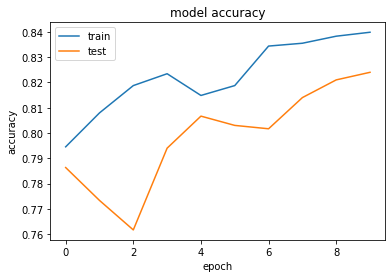

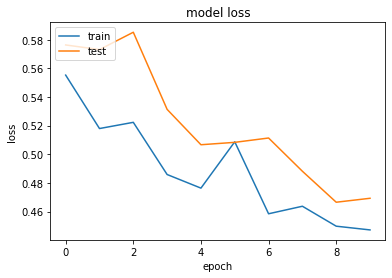

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
vgg19_final_model.save(filepath='/content/drive/MyDrive/Kaggle/' )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Kaggle/assets


# Additional Experiments / exercises etc.

In [57]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Kaggle/')

new_model.summary()

# new_model.fit(train_generator,  
#               steps_per_epoch=10,
#               epochs=40,
#               validation_data=test_generator,
#               validation_steps=24)

# new_model.evaluate(test_generator)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
new_model.evaluate(test_generator)

24/24 [==============================] - 519s 22s/step - loss: 0.4693 - accuracy: 0.8240


[0.4692767858505249, 0.8240000009536743]

In [ ]:
# no_of_epochs = 50

# vgg19_filepath = './vgg_19_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'

# vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg19_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# vgg19_history = vgg19_final_model.fit(train_generator,
#                                       epochs = no_of_epochs ,
#                                       validation_data = test_generator,
#                                       callbacks=[vgg_checkpoint,vgg_early_stopping],
#                                       verbose=1)


In [11]:
pred_datagen = ImageDataGenerator(rescale=1/255)
pred_generator = pred_datagen.flow_from_directory(
                                                './seg_pred/',
                                                target_size=(150, 150),
                                                batch_size=128,
                                                class_mode=None,
                                                shuffle=False)

encoded_classes = train_generator.class_indices
print('class names = ',encoded_classes)

Found 7301 images belonging to 1 classes.
class names =  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [19]:
pred_generator.reset()
predictions = new_model.predict(pred_generator, verbose=1)

58/58 [==============================] - 44s 766ms/step


In [21]:
# predictions.shape
# print(predictions[0:5])
# print(np.argmax(predictions[0:5],axis=1))


predicted_class_indices = np.argmax(predictions, axis=1)
print(predicted_class_indices)

labels = train_generator.class_indices
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

predicted_classes = [labels[k] for k in predicted_class_indices]
print(predicted_classes)


seg_pred_filenames=pred_generator.filenames
final_results=pd.DataFrame({"Filename":seg_pred_filenames,
                            "Predictions":predicted_classes})
print(final_results)
# final_results.to_csv("results.csv",index=False)


[5 3 5 ... 3 1 5]
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
['street', 'mountain', 'street', 'mountain', 'mountain', 'forest', 'sea', 'glacier', 'sea', 'street', 'sea', 'street', 'mountain', 'buildings', 'buildings', 'glacier', 'forest', 'forest', 'mountain', 'sea', 'street', 'street', 'street', 'street', 'glacier', 'buildings', 'forest', 'mountain', 'glacier', 'mountain', 'sea', 'sea', 'glacier', 'sea', 'sea', 'mountain', 'sea', 'glacier', 'mountain', 'glacier', 'glacier', 'street', 'glacier', 'sea', 'sea', 'forest', 'mountain', 'mountain', 'street', 'glacier', 'street', 'buildings', 'forest', 'buildings', 'forest', 'sea', 'mountain', 'street', 'buildings', 'street', 'buildings', 'forest', 'glacier', 'sea', 'forest', 'mountain', 'mountain', 'street', 'forest', 'street', 'glacier', 'forest', 'sea', 'street', 'forest', 'forest', 'mountain', 'sea', 'glacier', 'sea', '

['7088.jpg', '7089.jpg', '709.jpg', '7092.jpg', '7094.jpg', '7099.jpg', '7100.jpg', '7104.jpg', '7106.jpg', '7107.jpg', '7109.jpg', '7110.jpg', '7112.jpg', '7115.jpg', '7117.jpg', '7119.jpg', '7124.jpg', '7130.jpg', '7133.jpg', '7137.jpg', '7147.jpg', '7148.jpg', '7149.jpg', '7153.jpg', '7156.jpg', '7158.jpg', '7159.jpg', '7160.jpg', '7161.jpg', '7162.jpg', '7177.jpg', '718.jpg', '7182.jpg', '7183.jpg', '7186.jpg', '7187.jpg', '7190.jpg', '7194.jpg', '72.jpg', '720.jpg', '7208.jpg', '7210.jpg', '7211.jpg', '7213.jpg', '7217.jpg', '7218.jpg', '7219.jpg', '7224.jpg', '7230.jpg', '7242.jpg', '7243.jpg', '7244.jpg', '7249.jpg', '7257.jpg', '7260.jpg', '7263.jpg', '7266.jpg', '7269.jpg', '7270.jpg', '7272.jpg', '7273.jpg', '7279.jpg', '7280.jpg', '7283.jpg', '7295.jpg', '7296.jpg', '7299.jpg', '73.jpg', '7301.jpg', '7304.jpg', '7305.jpg', '7310.jpg', '7312.jpg', '7315.jpg', '7316.jpg', '7317.jpg', '732.jpg', '7322.jpg', '7329.jpg', '7334.jpg', '7335.jpg', '734.jpg', '7348.jpg', '7349.jpg', 

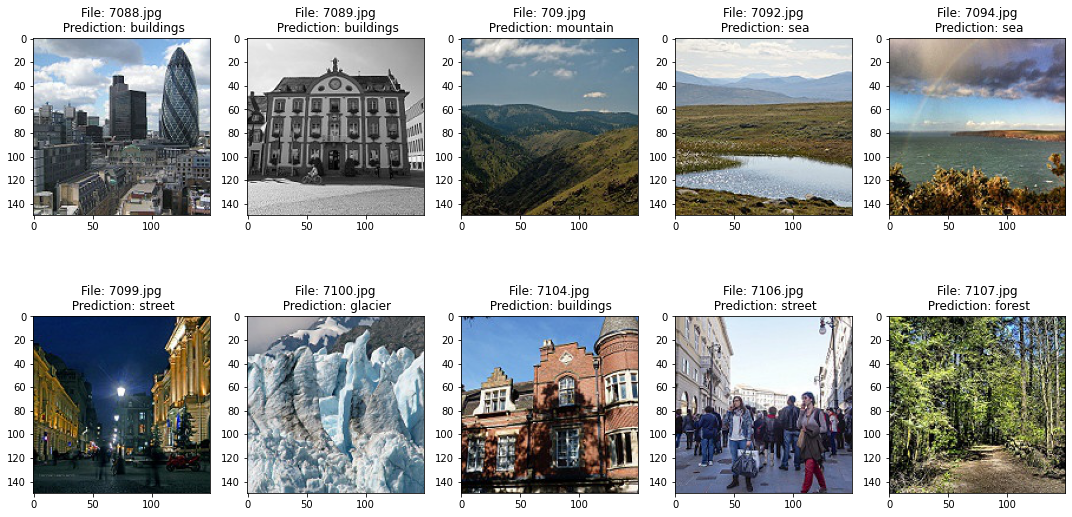

In [54]:
# A group of images
dir = '/content/drive/MyDrive/Kaggle/seg_pred/seg_pred/'
filenames = [i for i in os.listdir(dir)]

# fetch predicted class value from dataframe using df.loc
# print(filenames)
# for i in filenames:
#     # i = 'seg_pred/'+i
#     df2=final_results.loc[final_results['Filename'] == 'seg_pred/'+i, 'Predictions'].item()
#     print(df2)

num_image = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_image):
    ax = axes[i//num_col, i%num_col]
    image = mpimg.imread(dir + filenames[i])
    ax.imshow(image)
    ax.set_title('File: {}\n Prediction: {}'.format(filenames[i],final_results.loc[final_results['Filename'] == 'seg_pred/'+filenames[i], 'Predictions'].item()))
plt.tight_layout()
plt.show()